In [6]:
#import libraries needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

# Direct Methods for the solution of Linear Systems

## 1.
Given a matrix A ∈ nxn and the vector x_true = (1, 1, ... , 1)T ∈ R n, write a script that:

- Computes the right-hand side of the linear system b = A x_true.

- Computes the condition number in 2-norm of the matrix A. It is ill-conditioned? What if we use the ∞-norm instead of the 2-norm?

- Solves the linear system Ax = b with the function np.linalg.solve().

- Computes the relative error between the solution computed before and the true solution x_true.
Remember that the relative error between x_true and x in R n can be computed as 
$E(x_{true}, x) = \frac{||x - x_{true}||_2}{||x_{true}||_2} $

- Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new
window) the condition number in 2-norm K2(A) and in ∞-norm, as a function of n.

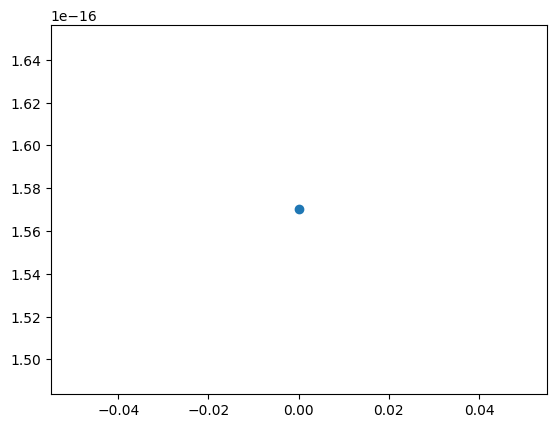

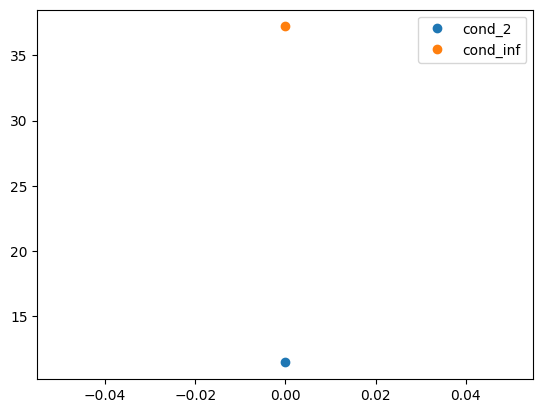

In [7]:
n = 10  #size of the matrix

A = np.random.randn(n,n)    #define the random transformation matrix
x_true = np.ones((n,))      #define the true x

b = A@x_true                #calculate the right hand side of the linear system b=Ax_true

cond_2 = np.linalg.cond(A, 2)               #calculate the condition number in 2-norm
cond_inf = np.linalg.cond(A, np.Infinity)   #calculate the condition number in inf-norm

x = np.linalg.solve(A, b)   #solve the linear system Ax=b

relative_error = np.linalg.norm(x-x_true, 2)/np.linalg.norm(x_true, 2)  #compute the relative error

plt.plot(relative_error, 'o')   #plot the errors
plt.figure()
plt.plot(cond_2, 'o')           #plot cond_2
plt.plot(cond_inf, 'o')         #plot co_inf
plt.legend(['cond_2', 'cond_inf'])
plt.show()

From a single point it's hard to get any conclusion over the relationship between the condition number and the error.

---
## 2.
Test the program above with the following choices of A ∈ R nxn:

- A random matrix (created with the function np.random.rand()) with size varying with n = {10, 20, 30, ... , 100}

- The Vandermonde matrix (np.vander) of dimension n = {5, 10, 15 20, 25, 30} with respect to the
vector x = {1, 2, 3, ... , n}.

- The Hilbert matrix (scipy.linalg.hilbert) of dimension n = {4, 5, 6, ... , 12}.

#### Random matrix

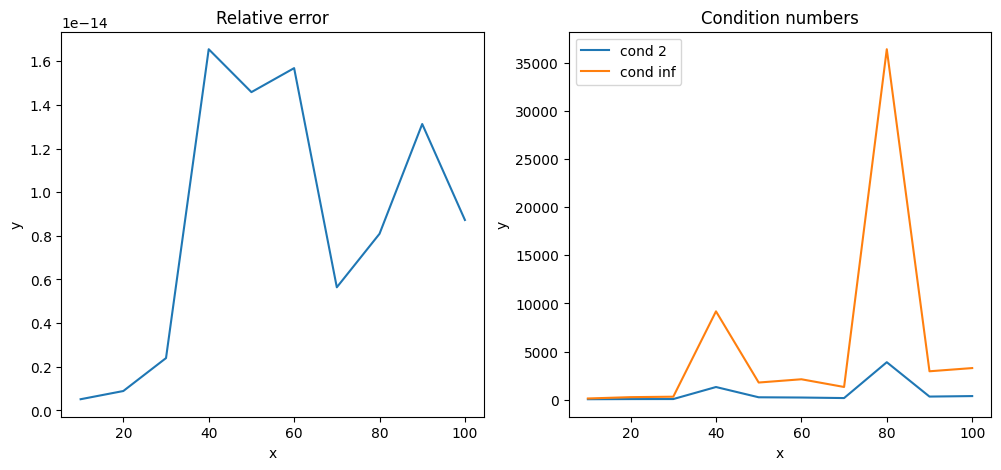

In [54]:
n_vector = np.arange(10, 101, 10)

#Initialize lists for the results
k_2 = []
k_inf = []
error = []

for n in n_vector:

    A = np.random.randn(n,n)    #define the random transformation matrix
    x_true = np.ones((n,))      #define the true x

    b = A@x_true                #calculate the right-hand side

    k_2.append(np.linalg.cond(A, 2))            #calculate the condition number in 2 norm
    k_inf.append(np.linalg.cond(A, np.inf))     #calculate the condition number in inf norm
    
    x = np.linalg.solve(A, b)      #solve the linear system
    
    error.append(np.linalg.norm(x-x_true, 2)/np.linalg.norm(x_true, 2))     #compute the relative error

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title('Relative error')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(n_vector, error)

plt.subplot(1,2,2)
plt.title('Condition numbers')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(n_vector, k_2)
plt.plot(n_vector, k_inf)
plt.legend(['cond 2', 'cond inf'])

plt.show()

What we can see from this plot is that the plot of the error roughly follows the plot of the contition number: the bigger spikes are alligned with big condition numbers. 

It's also important to notice that, while the plots are similar, they are not exactly identical. The reason is well explained in the theory.

Let's analyze the formula for the relative error of the result

$$\frac{||\delta x||}{||x||} \leq \frac{K(A)}{1-K(A)\frac{||\delta A||}{||A||}}(\frac{||\delta A||}{||A||}+\frac{||\delta b||}{||b||})$$

but in our case we defined A, we know it without errors, so the formula becomes

$$\frac{||\delta x||}{||x||} \leq K(A)\frac{||\delta b||}{||b||}$$

The formula gives us only an upper bound for the error, not an accurate estimate of it. For this reason the plot of the error only roughly follows the one of the condition number.

Since we defined $x_{true}$ and $A$ the error on those is exaclty 0.
<br>
Another thing to notice is the fact that generally the codition number increases with the size of the matrix.
<br>

The formula for the relative error of the sum/difference is

$$\frac{||\delta (a+b)||}{||a+b||}\leq \frac{||a||}{||a+b||} \frac{||\delta a||}{||a||}+\frac{||b||}{||a+b||}\frac{||\delta b||}{||b||}$$

It's evident that when a and b are *relatively* close the multiplication factor of the relative error can be arbitrarily big.

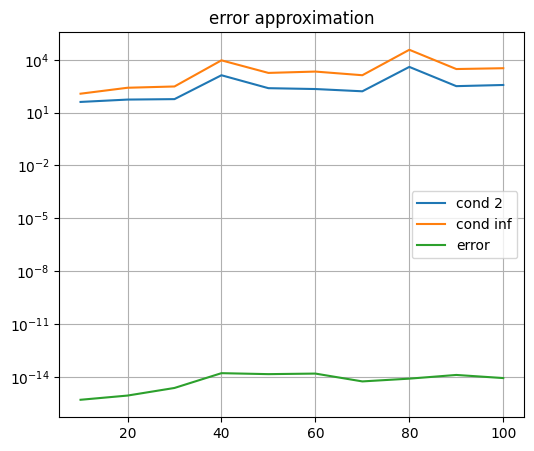

In [59]:
eps=np.finfo(float).eps

cond2=np.array(k_2)*eps
condInf=np.array(k_inf)*eps

plt.figure(figsize=(6, 5))
plt.title('error approximation')
plt.yscale('log')
plt.grid()
plt.plot(n_vector,k_2)      
plt.plot(n_vector,k_inf)  
plt.plot(n_vector,error)      
plt.legend(['cond 2','cond inf','error'])

As we expected

$\frac{||\delta x||}{||x||} \leq K(A)\frac{||\delta b||}{||b||}$

is a pretty nice upper bound for the error. 


#### Vandermonde matrix

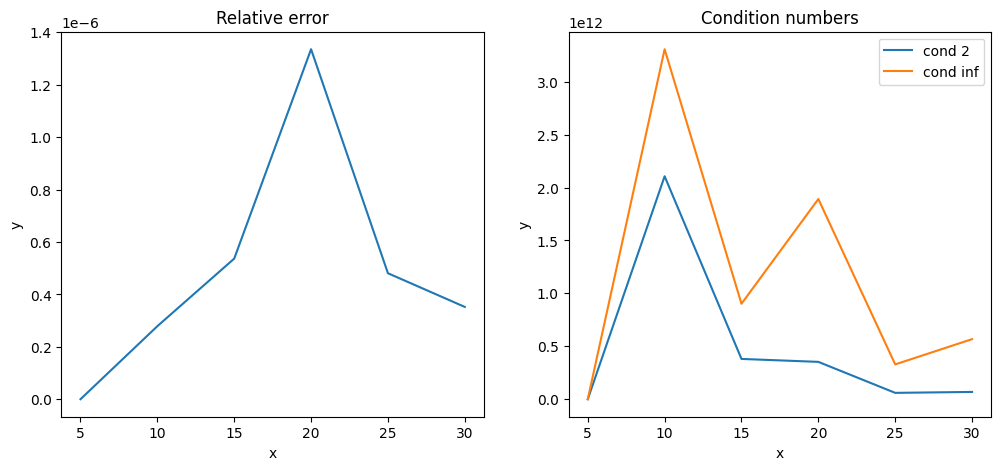

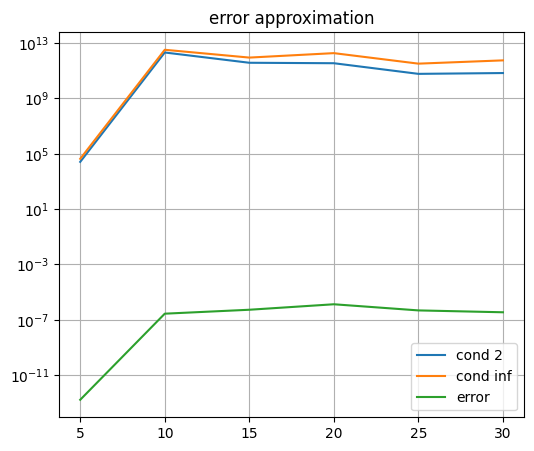

In [62]:
n_vector = np.array([5, 10, 15, 20, 25, 30])

#Initialize lists for thre results
k_2 = []
k_inf = []
error = []

for n in n_vector:

    x_vector = np.arange(1, n+1, 1)
    A = np.vander(x_vector)         #define the random transformation matrix
    x_true = np.ones((n,))          #define the true x

    b = A@x_true                #calculate the right-hand side

    k_2.append(np.linalg.cond(A, 2))            #calculate the condition number in 2 norm
    k_inf.append(np.linalg.cond(A, np.inf))     #calculate the condition number in inf norm
    
    x = np.linalg.solve(A, b)      #solve the linear system
    
    error.append(np.linalg.norm(x-x_true, 2)/np.linalg.norm(x_true, 2))     #compute the relative error

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title('Relative error')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(n_vector, error)

plt.subplot(1,2,2)
plt.title('Condition numbers')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(n_vector, k_2)
plt.plot(n_vector, k_inf)
plt.legend(['cond 2', 'cond inf'])

plt.show()

plt.figure(figsize=(6, 5))

plt.title('error approximation')
plt.yscale('log')
plt.grid()
plt.plot(n_vector,k_2)      
plt.plot(n_vector,k_inf)  
plt.plot(n_vector,error)      
plt.legend(['cond 2','cond inf','error'])

plt.show()


The condition number is an upper bound to the the increase of the relative error.

#### Hilbert

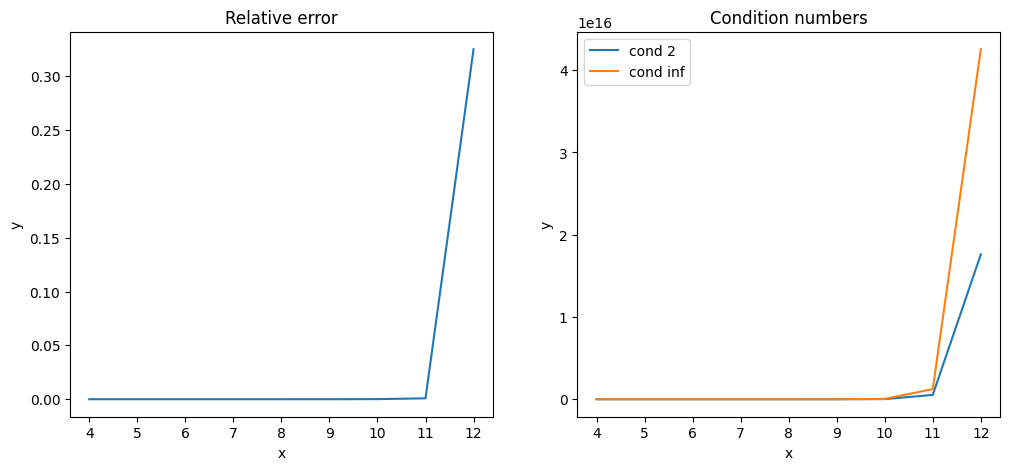

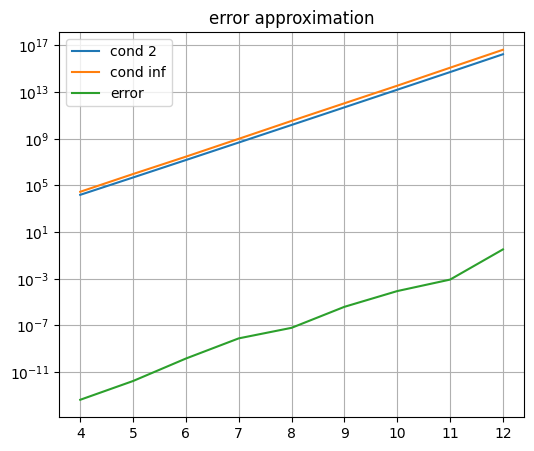

In [63]:
n_vector = np.arange(4, 12+1, 1)

#Initialize lists for the results
k_2 = []
k_inf = []
error = []

for n in n_vector:

    A = scipy.linalg.hilbert(n)     #define the random transformation matrix
    x_true = np.ones((n,))          #define the true x

    b = A@x_true                #calculate the right-hand side

    k_2.append(np.linalg.cond(A, 2))            #calculate the condition number in 2 norm
    k_inf.append(np.linalg.cond(A, np.inf))     #calculate the condition number in inf norm
    
    x = np.linalg.solve(A, b)      #solve the linear system
    
    error.append(np.linalg.norm(x-x_true, 2)/np.linalg.norm(x_true, 2))     #compute the relative error

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title('Relative error')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(n_vector, error)

plt.subplot(1,2,2)
plt.title('Condition numbers')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(n_vector, k_2)
plt.plot(n_vector, k_inf)
plt.legend(['cond 2', 'cond inf'])

plt.show()

plt.figure(figsize=(6, 5))

plt.title('error approximation')
plt.yscale('log')
plt.grid()
plt.plot(n_vector,k_2)      
plt.plot(n_vector,k_inf)  
plt.plot(n_vector,error)      
plt.legend(['cond 2','cond inf','error'])

plt.show()